In [61]:
import os
import matplotlib.pyplot as plt

In [35]:
dir='D:\\TF stuffs\\cell_images'

In [36]:
os.listdir(dir)

['test', 'train']

In [45]:
os.listdir(dir+'\\train')


['parasitized', 'uninfected']

In [97]:
os.listdir(dir+'\\train'+'\\parasitized')[1]

'C100P61ThinF_IMG_20150918_144104_cell_163.png'

In [53]:
from matplotlib.image import imread

In [88]:
inf=imread('D:\\TF stuffs\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png')

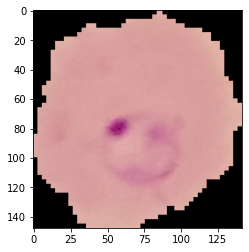

In [89]:
plt.imshow(inf)

In [75]:
os.listdir(dir+'\\train\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [79]:
uninf=dir+'\\trian\\uninfected\\'+os.listdir(dir+'\\train\\uninfected')[0]

In [84]:
uninf

'D:\\TF stuffs\\cell_images\\trian\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

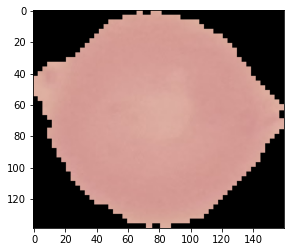

In [103]:
plt.imshow(imread(dir+'\\train'+'\\uninfected\\'+os.listdir(dir+'\\train\\uninfected')[0]))

In [100]:
pwd

'C:\\Users\\Nachi\\TF_2_Notebooks_and_Data\\04-CNNs'

In [114]:
dim1=[]
dim2=[]

for im in os.listdir(dir+'\\train\\'+'parasitized'):
    a=imread(dir+'\\train\\'+'parasitized\\'+im)
    d1,d2,c=a.shape
    dim1.append(d1)
    dim2.append(d2)
    
#every image in different size therefor diff dim..so getting imaged dim

In [115]:
dim1

[148,
 208,
 151,
 154,
 154,
 145,
 139,
 124,
 148,
 142,
 154,
 139,
 142,
 136,
 163,
 133,
 151,
 205,
 157,
 133,
 145,
 115,
 139,
 151,
 136,
 97,
 160,
 118,
 133,
 166,
 130,
 130,
 136,
 148,
 154,
 151,
 139,
 154,
 115,
 136,
 127,
 184,
 154,
 118,
 136,
 166,
 121,
 172,
 145,
 151,
 151,
 133,
 139,
 124,
 148,
 148,
 172,
 118,
 157,
 133,
 196,
 154,
 142,
 148,
 175,
 217,
 190,
 154,
 142,
 145,
 157,
 136,
 130,
 127,
 184,
 166,
 145,
 139,
 109,
 118,
 145,
 157,
 124,
 148,
 136,
 148,
 115,
 145,
 148,
 142,
 127,
 178,
 160,
 136,
 106,
 139,
 130,
 145,
 139,
 124,
 130,
 133,
 130,
 103,
 163,
 139,
 127,
 136,
 157,
 136,
 154,
 190,
 136,
 166,
 136,
 136,
 145,
 148,
 127,
 148,
 151,
 148,
 127,
 118,
 133,
 130,
 145,
 130,
 148,
 124,
 145,
 154,
 130,
 163,
 139,
 145,
 166,
 142,
 160,
 139,
 133,
 211,
 142,
 121,
 148,
 151,
 130,
 154,
 145,
 169,
 127,
 145,
 148,
 139,
 136,
 145,
 124,
 124,
 124,
 127,
 154,
 142,
 100,
 166,
 139,
 148,
 97,


C:\Users\Nachi\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


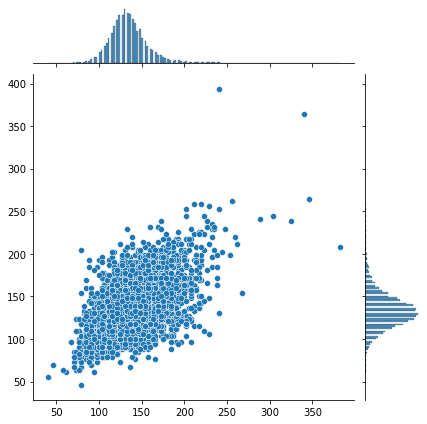

In [117]:
import seaborn as sns
sns.jointplot(dim1,dim2)

In [119]:
import numpy as np
np.mean(dim1)

134.360205144643

In [120]:
np.mean(dim2)

133.66447632021797

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [130]:
img_gen=ImageDataGenerator(horizontal_flip=True,width_shift_range=0.2
                           ,height_shift_range=0.1,rotation_range=0.2,
                           rescale=1,shear_range=0.2,fill_mode='nearest'
)
#rescale=if in case the data set is not normalised we can specify rescale=1/255
#shear_range=cropping of image,
#fill_mode=in case if we need to exapnd our image in atransformation...the empty pixels are filled based on the nearest one


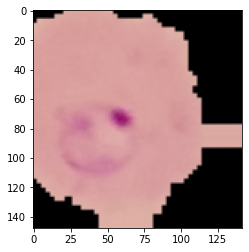

In [131]:

plt.imshow(img_gen.random_transform(imread('D:\\TF stuffs\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png')))

In [135]:
img_gen.flow_from_directory('D:\\TF stuffs\\cell_images\\train\\')
#to get the batches from the directory since we have complex data(high pixel data)

Found 24958 images belonging to 2 classes.


In [140]:
inf=imread('D:\\TF stuffs\\cell_images\\train\\parasitized\\'+os.listdir(dir+'\\train\\parasitized\\')[0])

In [142]:
inf.shape

(148, 142, 3)

In [143]:
inf=imread('D:\\TF stuffs\\cell_images\\train\\parasitized\\'+os.listdir(dir+'\\train\\parasitized\\')[1])

In [144]:
inf.shape

(208, 148, 3)

In [150]:
inp_shp=(130,130,3)

In [145]:
from tensorflow.keras.models import Sequential

In [148]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [153]:
sq=Sequential()
sq.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=inp_shp))
#we need to reshape the image with common dimention(mean)...so that we can fit it into the convolution neural network->by input_shape
sq.add(MaxPool2D(pool_size=(2,2)))

sq.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=inp_shp))
sq.add(MaxPool2D(pool_size=(2,2)))

sq.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=inp_shp))
sq.add(MaxPool2D(pool_size=(2,2)))

sq.add(Flatten())

sq.add(Dense(128,activation='relu'))

sq.add(Dense(1,activation='sigmoid'))

sq.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [154]:
train='D:\\TF stuffs\\cell_images\\train\\'
test='D:\\TF stuffs\\cell_images\\test\\'

In [157]:
#for splitting batches 
train_gen=img_gen.flow_from_directory(train,target_size=(130,130),color_mode='rgb',batch_size=16,class_mode='binary')

Found 24958 images belonging to 2 classes.


In [159]:
#****shuffle='False'-->the labbele would get shuffled***
test_gen=img_gen.flow_from_directory(test,target_size=(130,130),color_mode='rgb',batch_size=16,class_mode='binary',shuffle='False')

Found 2600 images belonging to 2 classes.


In [167]:
train_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [160]:
from tensorflow.keras.callbacks import EarlyStopping

In [161]:
stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [162]:
sq.fit_generator(train_gen,callbacks=stop,validation_data=test_gen,epochs=25)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
  70/1560 [>.............................] - ETA: 12:35 - loss: 5.4248 - accuracy: 0.5411

KeyboardInterrupt: 

In [163]:
from tensorflow.keras.models import load_model

In [164]:
m=load_model('malaria_detector.h5')

In [213]:
m.evaluate_generator(test_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[45.585174560546875, 0.8161538243293762]

In [215]:
pred= m.predict_generator(test_gen)

In [216]:
pred

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [217]:
predict=pred>0.5

In [218]:
predict

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [219]:
len(pred)

2600

In [188]:
from sklearn.metrics import classification_report,confusion_matrix

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [189]:
#for the true values i.e y_tes

In [192]:
test_gen.classes #usange of shuffle helps here

array([0, 0, 0, ..., 1, 1, 1])

In [259]:
test_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [207]:
print(classification_report(test_gen.classes,predict))#since we use 

              precision    recall  f1-score   support

           0       0.50      0.66      0.57      1300
           1       0.50      0.35      0.41      1300

    accuracy                           0.50      2600
   macro avg       0.50      0.50      0.49      2600
weighted avg       0.50      0.50      0.49      2600



In [220]:
confusion_matrix(test_gen.classes,predict)

array([[836, 464],
       [863, 437]], dtype=int64)

In [231]:
from tensorflow.keras.preprocessing import image

In [250]:
tes=image.load_img('D:\\TF stuffs\\cell_images\\train\\parasitized\\'+os.listdir(dir+'\\train\\parasitized\\')[0],target_size=inp_shp)

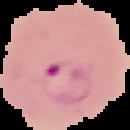

In [251]:
tes

In [254]:
tesmat=image.img_to_array(tes)

In [255]:
trans=np.expand_dims(tesmat,axis=0)

In [256]:
trans.shape

(1, 130, 130, 3)

In [258]:
m.predict(trans)

array([[0.]], dtype=float32)